<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

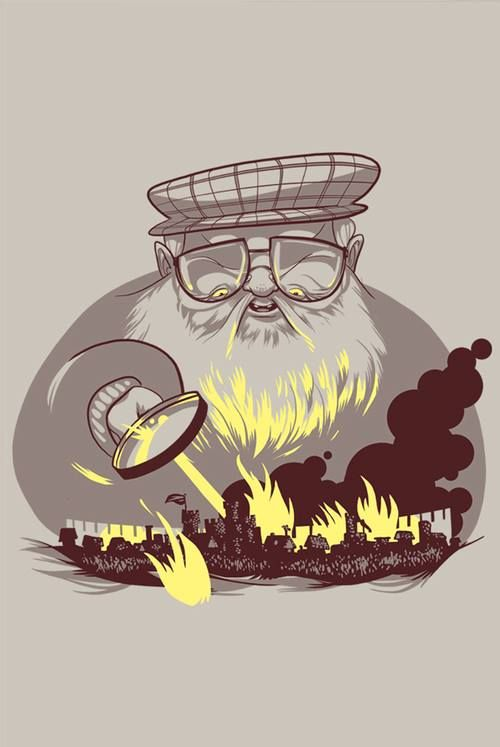

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [50]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 48.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 84.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [52]:
data_train = pd.read_csv("/content/game_of_thrones_train.csv", index_col = "S.No")
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col = "S.No")

data_train.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [53]:
data_train.info

<bound method DataFrame.info of                       name                 title  male     culture  \
S.No                                                                 
1     Viserys II Targaryen                   NaN     1         NaN   
2              Walder Frey  Lord of the Crossing     1    Rivermen   
3             Addison Hill                   Ser     1         NaN   
4              Aemma Arryn                 Queen     0         NaN   
5           Sylva Santagar            Greenstone     0     Dornish   
...                    ...                   ...   ...         ...   
1553                Marwyn           Archmaester     1         NaN   
1554          Masha Heddle                   NaN     0         NaN   
1555      Matthos Seaworth                   NaN     1         NaN   
1556            Meera Reed                   NaN     0  Crannogmen   
1557    Melara Hetherspoon                   NaN     0         NaN   

      dateOfBirth              mother            father                heir  \
S.No                                                                          
1             NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen   
2           208.0                 NaN               NaN                 NaN   
3             NaN                 NaN               NaN                 NaN   
4            82.0                 NaN               NaN                 NaN   
5           276.0                 NaN               NaN                 NaN   
...           ...                 ...               ...                 ...   
1553          NaN                 NaN               NaN                 NaN   
1554          NaN                 NaN               NaN                 NaN   
1555          NaN                 NaN               NaN                 NaN   
1556        283.0                 NaN               NaN                 NaN   
1557        264.0                 NaN               NaN                 NaN   

                  house               spouse  ...  isAliveMother  \
S.No                                          ...                  
1                   NaN                  NaN  ...            1.0   
2            House Frey          Perra Royce  ...            NaN   
3           House Swyft                  NaN  ...            NaN   
4           House Arryn  Viserys I Targaryen  ...            NaN   
5        House Santagar      Eldon Estermont  ...            NaN   
...                 ...                  ...  ...            ...   
1553                NaN                  NaN  ...            NaN   
1554                NaN                  NaN  ...            NaN   
1555     House Seaworth                  NaN  ...            NaN   
1556         House Reed                  NaN  ...            NaN   
1557  House Hetherspoon                  NaN  ...            NaN   

      isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  \
S.No                                                                        
1               0.0          0.0            NaN          0        0   NaN   
2               NaN          NaN            1.0          1        1  97.0   
3               NaN          NaN            NaN          0        1   NaN   
4               NaN          NaN            0.0          1        1  23.0   
5               NaN          NaN            1.0          1        1  29.0   
...             ...          ...            ...        ...      ...   ...   
1553            NaN          NaN            NaN          0        1   NaN   
1554            NaN          NaN            NaN          0        0   NaN   
1555            NaN          NaN            NaN          0        0   NaN   
1556            NaN          NaN            NaN          0        0  22.0   
1557            NaN          NaN            NaN          0        0  12.0   

      numDeadRelations  popularity  isAlive  
S.No                                         
1                   11    0.605351        0  
2   

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [54]:
data_train.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


Создадим столбец last_year_alive - он будет показывать, дожил ли персонаж до 305 года (последний год в книге)

In [55]:
data_train["last_year_alive"] = data_train["age"] + data_train["dateOfBirth"]
data_train["last_year_alive"].fillna("unknown", inplace = True)

data_train.loc[data_train["last_year_alive"] == 305, "last_year_alive"] = "last_year"   #заменяем 305 год на last_year
mask = data_train["last_year_alive"].apply(lambda x: not isinstance(x, str))  #если в столбце число, значит не дожил до 305, так как не попал в категории last_year и unknown
data_train.loc[mask, "last_year_alive"] = "died"  #Заменяем числа на died

data_train["age"].fillna(data_train["age"].median(), inplace = True)
data_train.drop("dateOfBirth", axis = 1, inplace = True)
data_train

<ipython-input-55-7a3ca420ec4e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train["last_year_alive"].fillna("unknown", inplace = True)
<ipython-input-55-7a3ca420ec4e>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_train["last_year_alive"].fillna("unknown", inplace = True)
<ipython-input-55-7a3ca420ec4e>:8: FutureWarning: A value i

,name,title,male,culture,mother,father,heir,house,spouse,book1,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,last_year_alive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,...,0.0,0.0,NaN,0,0,24.0,11,0.605351,0,unknown
2,Walder Frey,Lord of the Crossing,1,Rivermen,NaN,NaN,NaN,House Frey,Perra Royce,1,...,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,last_year
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,House Swyft,NaN,0,...,NaN,NaN,NaN,0,1,24.0,0,0.267559,1,unknown
4,Aemma Arryn,Queen,0,NaN,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,...,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,died
5,Sylva Santagar,Greenstone,0,Dornish,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,...,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,last_year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,0,1,24.0,0,0.160535,1,unknown
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,0,0,24.0,0,0.040134,0,unknown
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,House Seaworth,NaN,0,...,NaN,NaN,NaN,0,0,24.0,0,0.076923,0,unknown


Повтор для test

In [56]:
data_test["last_year_alive"] = data_test["age"] + data_test["dateOfBirth"]
data_test["last_year_alive"].fillna("unknown", inplace = True)

data_test.loc[data_test["last_year_alive"] == 305, "last_year_alive"] = "last_year"
mask = data_test["last_year_alive"].apply(lambda x: not isinstance(x, str))
data_test.loc[mask, "last_year_alive"] = "died"

data_test["age"].fillna(data_test["age"].median(), inplace = True)
data_test.drop("dateOfBirth", axis = 1, inplace = True)
data_test

<ipython-input-56-e2140952564c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test["last_year_alive"].fillna("unknown", inplace = True)
<ipython-input-56-e2140952564c>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_test["last_year_alive"].fillna("unknown", inplace = True)
<ipython-input-56-e2140952564c>:8: FutureWarning: A value is 

,name,title,male,culture,mother,father,heir,house,spouse,book1,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,last_year_alive
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,NaN,NaN,NaN,House Blackwood,NaN,0,...,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167,died
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,R'hllor,NaN,0,...,NaN,NaN,NaN,NaN,0,0,32.0,0,0.745819,unknown
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,0,...,NaN,NaN,NaN,NaN,0,0,32.0,0,0.010033,unknown
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,House Trant,NaN,1,...,NaN,NaN,NaN,NaN,0,1,32.0,0,0.220736,unknown
1562,Merrett Frey,NaN,1,Riverlands,NaN,NaN,NaN,House Frey,Mariya Darry,1,...,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,House Stark,NaN,1,...,NaN,NaN,NaN,NaN,0,0,32.0,0,0.351171,unknown
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,House Bolton,NaN,0,...,NaN,NaN,NaN,NaN,0,0,32.0,0,0.096990,unknown
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,0,0,32.0,0,0.030100,unknown


In [57]:
data_train.isna().sum()

,0
name,0
title,840
male,0
culture,1069
mother,1539
father,1535
heir,1536
house,381
spouse,1357
book1,0


Заменяем все nan на unknown

In [58]:
data_train["house"].fillna("unknown_house", inplace = True)
data_train["title"].fillna("no_title", inplace = True)
data_train["culture"].fillna("unknown_culture", inplace = True)

#и для теста

data_test["house"].fillna("unknown_house", inplace = True)
data_test["title"].fillna("no_title", inplace = True)
data_test["culture"].fillna("unknown_culture", inplace = True)

<ipython-input-58-b8d27a863b6a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train["house"].fillna("unknown_house", inplace = True)
<ipython-input-58-b8d27a863b6a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [59]:
data_train["isPopular"] = data_train["popularity"].apply(lambda x: 1 if x > 0.5 else 0)
data_train["boolDeadRelations"] = data_train["numDeadRelations"].apply(lambda x: 1 if x > 0 else 0)


data_test["isPopular"] = data_test["popularity"].apply(lambda x: 1 if x > 0.5 else 0)
data_test["boolDeadRelations"] = data_test["numDeadRelations"].apply(lambda x: 1 if x > 0 else 0)
data_train.head(10)

,name,title,male,culture,mother,father,heir,house,spouse,book1,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,last_year_alive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown_culture,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown_house,NaN,0,...,NaN,0,0,24.0,11,0.605351,0,unknown,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,NaN,NaN,NaN,House Frey,Perra Royce,1,...,1.0,1,1,97.0,1,0.896321,1,last_year,1,1
3,Addison Hill,Ser,1,unknown_culture,NaN,NaN,NaN,House Swyft,NaN,0,...,NaN,0,1,24.0,0,0.267559,1,unknown,0,0
4,Aemma Arryn,Queen,0,unknown_culture,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,...,0.0,1,1,23.0,0,0.183946,0,died,0,0
5,Sylva Santagar,Greenstone,0,Dornish,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,...,1.0,1,1,29.0,0,0.043478,1,last_year,0,0
6,Tommen Baratheon,no_title,1,unknown_culture,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,unknown_house,NaN,0,...,NaN,0,0,24.0,5,1.000000,1,unknown,1,1
7,Valarr Targaryen,Hand of the King,1,Valyrian,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,...,1.0,1,1,26.0,0,0.431438,0,died,0,0
8,Viserys I Targaryen,no_title,1,unknown_culture,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,unknown_house,NaN,0,...,NaN,0,0,24.0,5,0.678930,0,unknown,1,1
9,Wilbert,Ser,1,unknown_culture,NaN,NaN,NaN,unknown_house,NaN,0,...,NaN,0,1,24.0,0,0.006689,0,unknown,0,0


In [60]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

reverse_cult = {value: key for key, values in cult.items() for value in values}

data_train["culture"] = data_train["culture"].map(reverse_cult).fillna(data_train["culture"]) # замена через значение находим ключ, а если замена не нашлась (получился nan) возвращается исходное значение

data_test["culture"] = data_test["culture"].map(reverse_cult).fillna(data_test["culture"])

data_train["culture"]



,culture
S.No,
1,unknown_culture
2,Rivermen
3,unknown_culture
4,unknown_culture
5,Dornish
...,...
1553,unknown_culture
1554,unknown_culture
1555,unknown_culture


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [61]:
data_train.isna().sum()


,0
name,0
title,0
male,0
culture,0
mother,1539
father,1535
heir,1536
house,0
spouse,1357
book1,0


Избавимся от ненужных стобцов

In [62]:
data_train.drop(columns= ["name", "mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "book1", "book2", "book3", "book4"], inplace = True)

data_test.drop(columns= ["name", "mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "book1", "book2", "book3", "book4"], inplace = True)

Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [63]:
data_train
data_test

,title,male,culture,house,book5,isMarried,isNoble,age,numDeadRelations,popularity,last_year_alive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1558,no_title,0,unknown_culture,House Blackwood,1,0,0,100.0,0,0.050167,died,0,0
1559,no_title,0,Asshai,R'hllor,1,0,0,32.0,0,0.745819,unknown,1,0
1560,no_title,0,unknown_culture,Brotherhood without banners,0,0,0,32.0,0,0.010033,unknown,0,0
1561,Ser,1,unknown_culture,House Trant,1,0,1,32.0,0,0.220736,unknown,0,0
1562,no_title,1,Riverlands,House Frey,1,1,0,38.0,0,0.434783,died,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,no_title,1,Westeros,House Stark,1,0,0,32.0,0,0.351171,unknown,0,0
1943,no_title,1,unknown_culture,House Bolton,1,0,0,32.0,0,0.096990,unknown,0,0
1944,no_title,1,unknown_culture,unknown_house,1,0,0,32.0,0,0.030100,unknown,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

isAlive
1    1212
0     345
Name: count, dtype: int64


<Axes: >

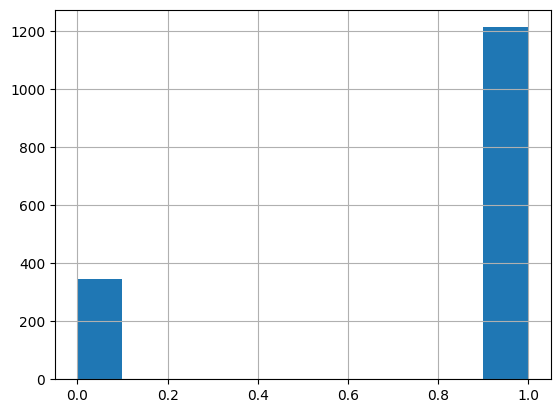

In [64]:
print(data_train["isAlive"].value_counts())

data_train["isAlive"].hist()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [65]:
categorical_columns = ['title', 'culture', 'house','last_year_alive']
categorical_features_train = data_train[categorical_columns]
categorical_features_test = data_test[categorical_columns]

num_columns = ["male", "book5", "isMarried", "isNoble", "age", "isAlive", "isPopular", "boolDeadRelations"]
num_features = data_train[num_columns]

data_train.drop(columns = ["numDeadRelations", "popularity"], inplace = True) #Дропаем то что заменили другими колонками ранее

data_test.drop(columns = ["numDeadRelations", "popularity"], inplace = True)
categorical_features_test

,title,culture,house,last_year_alive
S.No,,,,
1558,no_title,unknown_culture,House Blackwood,died
1559,no_title,Asshai,R'hllor,unknown
1560,no_title,unknown_culture,Brotherhood without banners,unknown
1561,Ser,unknown_culture,House Trant,unknown
1562,no_title,Riverlands,House Frey,died
...,...,...,...,...
1942,no_title,Westeros,House Stark,unknown
1943,no_title,unknown_culture,House Bolton,unknown
1944,no_title,unknown_culture,unknown_house,unknown


In [66]:
print(data_train.columns)
print(data_test.columns)

Index(['title', 'male', 'culture', 'house', 'book5', 'isMarried', 'isNoble',
       'age', 'isAlive', 'last_year_alive', 'isPopular', 'boolDeadRelations'],
      dtype='object')
Index(['title', 'male', 'culture', 'house', 'book5', 'isMarried', 'isNoble',
       'age', 'last_year_alive', 'isPopular', 'boolDeadRelations'],
      dtype='object')


In [67]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
one_hot_encoded_train = encoder.fit_transform(categorical_features_train)
one_hot_encoded_test = encoder.transform(categorical_features_test) #тест не fitим, только трансформим!!!

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_data_train = pd.DataFrame(one_hot_encoded_train, columns=encoder.get_feature_names_out(categorical_features_train.columns), index=data_train.index                    )
one_hot_data_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(categorical_features_test.columns), index = data_test.index)
one_hot_data_train

,title_Acorn Hall,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,...,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_unknown_house,house_wildling,last_year_alive_died,last_year_alive_last_year,last_year_alive_unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Объединим получившиеся столбцы после OHE и дропнем старые категориальные

In [68]:
data_train_encoded = pd.concat([one_hot_data_train, data_train], axis = 1)
data_train_encoded.drop(columns = categorical_columns, axis = 1, inplace = True)

data_test_encoded = pd.concat([one_hot_data_test, data_test], axis = 1)
data_test_encoded.drop(columns = categorical_columns, axis = 1, inplace = True)

data_train_encoded
data_test_encoded

,title_Acorn Hall,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,...,last_year_alive_died,last_year_alive_last_year,last_year_alive_unknown,male,book5,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,1,0,0,100.0,0,0
1559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,1,0,0,32.0,1,0
1560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,32.0,0,0
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,1,32.0,0,0
1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,1,1,0,38.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,32.0,0,0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,32.0,0,0
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,32.0,0,0


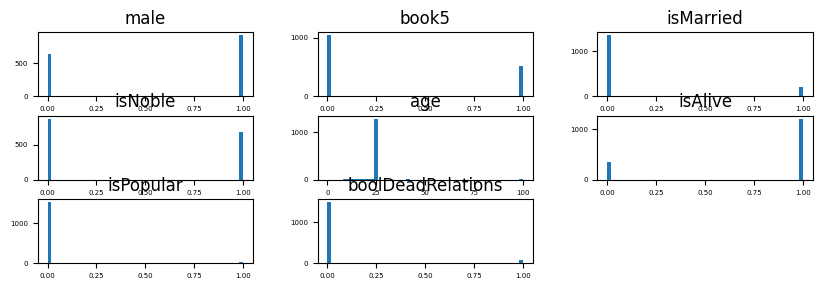

In [69]:
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False);


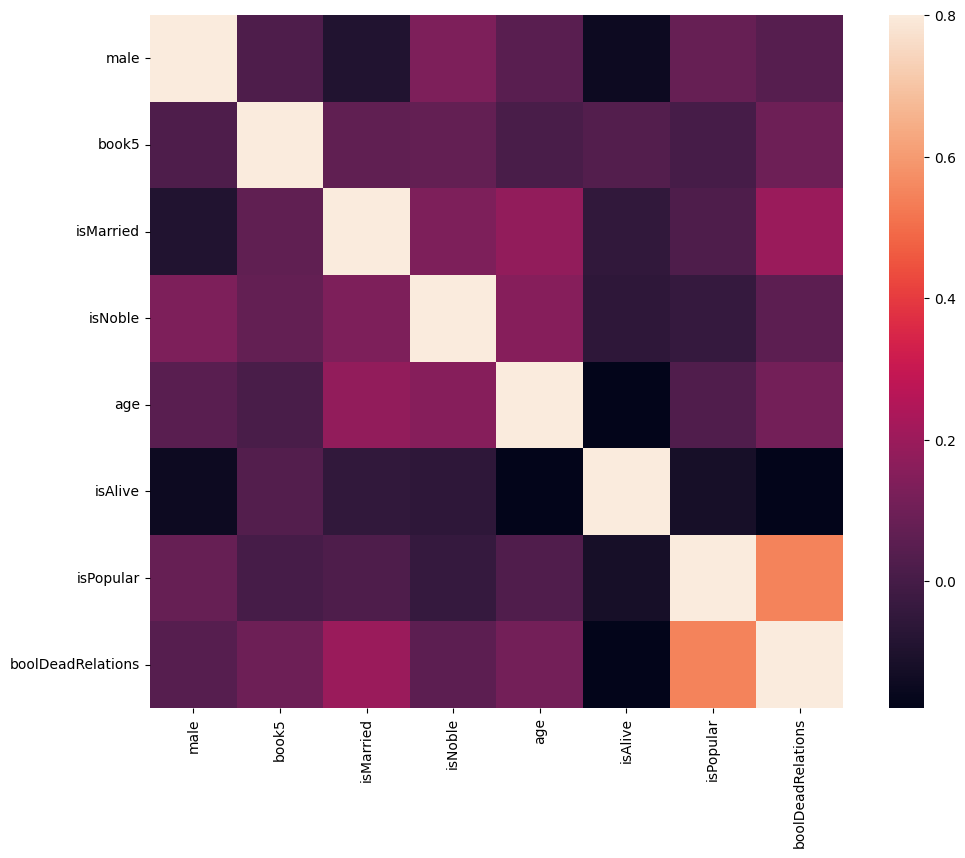

In [70]:
corrmat = data_train_encoded[num_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Видим корреляцию между мертвыми родственниками и популярностью

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

([<matplotlib.patches.Wedge at 0x7c3fa431ba90>,
 [Text(-0.8440738177692385, 0.7053647213721865, ''),
  Text(0.8440737847487322, -0.7053647608861326, '')],
 [Text(-0.4604039006014028, 0.3847443934757381, '77.8%'),
  Text(0.4604038825902175, -0.3847444150287996, '22.2%')])

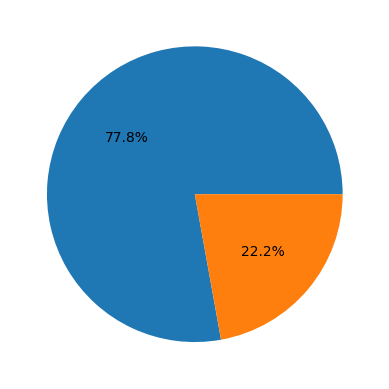

In [71]:
plt.pie(data_train["isAlive"].value_counts(), autopct="%1.1f%%")

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [72]:
y = data_train_encoded["isAlive"]
X = data_train_encoded.drop("isAlive", axis = 1)

In [73]:
data_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Columns: 572 entries, title_Acorn Hall to boolDeadRelations
dtypes: float64(565), int64(7)
memory usage: 6.8 MB


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [76]:
len(data_train)

1557

Нормализуем значения

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled

array([[ 0.        , -0.11765903, -0.04011247, ..., -0.16359342,
        -0.13412141, -0.19364917],
       [ 0.        , -0.11765903, -0.04011247, ..., -0.16359342,
        -0.13412141, -0.19364917],
       [ 0.        , -0.11765903, -0.04011247, ..., -0.16359342,
        -0.13412141, -0.19364917],
       ...,
       [ 0.        , -0.11765903, -0.04011247, ..., -0.16359342,
        -0.13412141, -0.19364917],
       [ 0.        , -0.11765903, -0.04011247, ..., -0.16359342,
        -0.13412141, -0.19364917],
       [ 0.        , -0.11765903, -0.04011247, ..., -0.16359342,
        -0.13412141, -0.19364917]])

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [79]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [80]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [81]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
log_reg_predict = logistic_regression.predict(X_test_scaled)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [82]:
len(X_test)

312

In [83]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
ada_predict = ada_boost.predict(X_test_scaled)

In [84]:
# Шаг 1. создание модели
random_forest = RandomForestClassifier()

# Шаг 2. обучение модели
random_forest.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
random_forest_predict = random_forest.predict(X_test_scaled)

In [85]:
# Шаг 1. создание модели
gaussian_process = GaussianProcessClassifier()

# Шаг 2. обучение модели
gaussian_process.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
gaussian_process_predict = gaussian_process.predict(X_test_scaled)

In [86]:
# Шаг 1. создание модели
gaussian_naive = GaussianNB()

# Шаг 2. обучение модели
gaussian_naive.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
gaussian_nb_predict = gaussian_naive.predict(X_test_scaled)

In [87]:
# Шаг 1. создание модели
k_neighbours = KNeighborsClassifier()

# Шаг 2. обучение модели
k_neighbours.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
k_neighbours_predict = k_neighbours.predict(X_test_scaled)

In [88]:
# Шаг 1. создание модели
svc_classifier = SVC()

# Шаг 2. обучение модели
svc_classifier.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
svc_classifier_predict = svc_classifier.predict(X_test_scaled)

In [89]:
# Шаг 1. создание модели
decision_tree = DecisionTreeClassifier()

# Шаг 2. обучение модели
decision_tree.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
decision_tree_predict = decision_tree.predict(X_test_scaled)

In [90]:
print(X_test_scaled.shape)
print(ada_predict.shape)

(312, 571)
(312,)


In [91]:
# Шаг 1. создание модели
ada_boost_fin = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost_fin.fit(X, y)

# Шаг 3. Предсказание на тестовых данных
ada_predict_fin = ada_boost_fin.predict(data_test_encoded)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [92]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [93]:
# Шаг 3. Предсказание на тестовых данных

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_log_reg = accuracy_score(y_test, log_reg_predict)
print("Accuracy log reg : %.4f" % accuracy_log_reg)

Accuracy log reg : 0.7981


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [94]:
accuracy_ada = accuracy_score(y_test, ada_predict)
print("Accuracy ada boost : %.4f" % accuracy_ada)

accuracy_random_forest = accuracy_score(y_test, random_forest_predict)
print("Accuracy random forest : %.4f" % accuracy_random_forest)

accuracy_gaussian_process = accuracy_score(y_test, gaussian_process_predict)
print("Accuracy gaussian process : %.4f" % accuracy_gaussian_process)

accuracy_gaussian_nb = accuracy_score(y_test, gaussian_nb_predict)
print("Accuracy gaussian_nb : %.4f" % accuracy_gaussian_nb)

accuracy_k_neighbours = accuracy_score(y_test, k_neighbours_predict)
print("Accuracy k_neighbours : %.4f" % accuracy_k_neighbours)

accuracy_svc = accuracy_score(y_test, svc_classifier_predict)
print("Accuracy SVC : %.4f" % accuracy_svc)

accuracy_decision_tree = accuracy_score(y_test, decision_tree_predict)
print("Accuracy decision tree : %.4f" % accuracy_decision_tree)

Accuracy ada boost : 0.8397
Accuracy random forest : 0.8269
Accuracy gaussian process : 0.7788
Accuracy gaussian_nb : 0.4840
Accuracy k_neighbours : 0.7917
Accuracy SVC : 0.8109
Accuracy decision tree : 0.7949


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [95]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.5MB/s]


In [96]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [97]:
submission["isAlive"] = ada_predict_fin
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [98]:
submission.to_csv("/content/new_submission.csv")